In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,AdaBoostRegressor,AdaBoostClassifier,GradientBoostingClassifier,GradientBoostingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('E:\Data Trained/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#We have to encode 3 columns - sex,smoker and region as their datatype is object

In [4]:
df.shape

(1338, 7)

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#congrats no nulls found

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(1337, 7)

In [9]:
# Only one duplicate was there, we removed that too

In [10]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# std of age is not balanced maybe because of ouliers also quartiles are not balanced. We will deal them soon

# Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [13]:
df2=lab_enc.fit_transform(df['sex'])
pd.Series(df2)

0       0
1       1
2       1
3       1
4       1
       ..
1332    1
1333    0
1334    0
1335    0
1336    0
Length: 1337, dtype: int32

In [14]:
df['sex']=df2

In [15]:
df3=lab_enc.fit_transform(df['smoker'])
pd.Series(df3)

0       1
1       0
2       0
3       0
4       0
       ..
1332    0
1333    0
1334    0
1335    0
1336    1
Length: 1337, dtype: int32

In [16]:
df['smoker']=df3

In [17]:
df4=lab_enc.fit_transform(df['region'])
pd.Series(df4)

0       3
1       2
2       2
3       1
4       1
       ..
1332    1
1333    0
1334    2
1335    3
1336    1
Length: 1337, dtype: int32

In [18]:
df['region']=df4

In [19]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 67.9 KB


#Encoding done

# Distribution of data

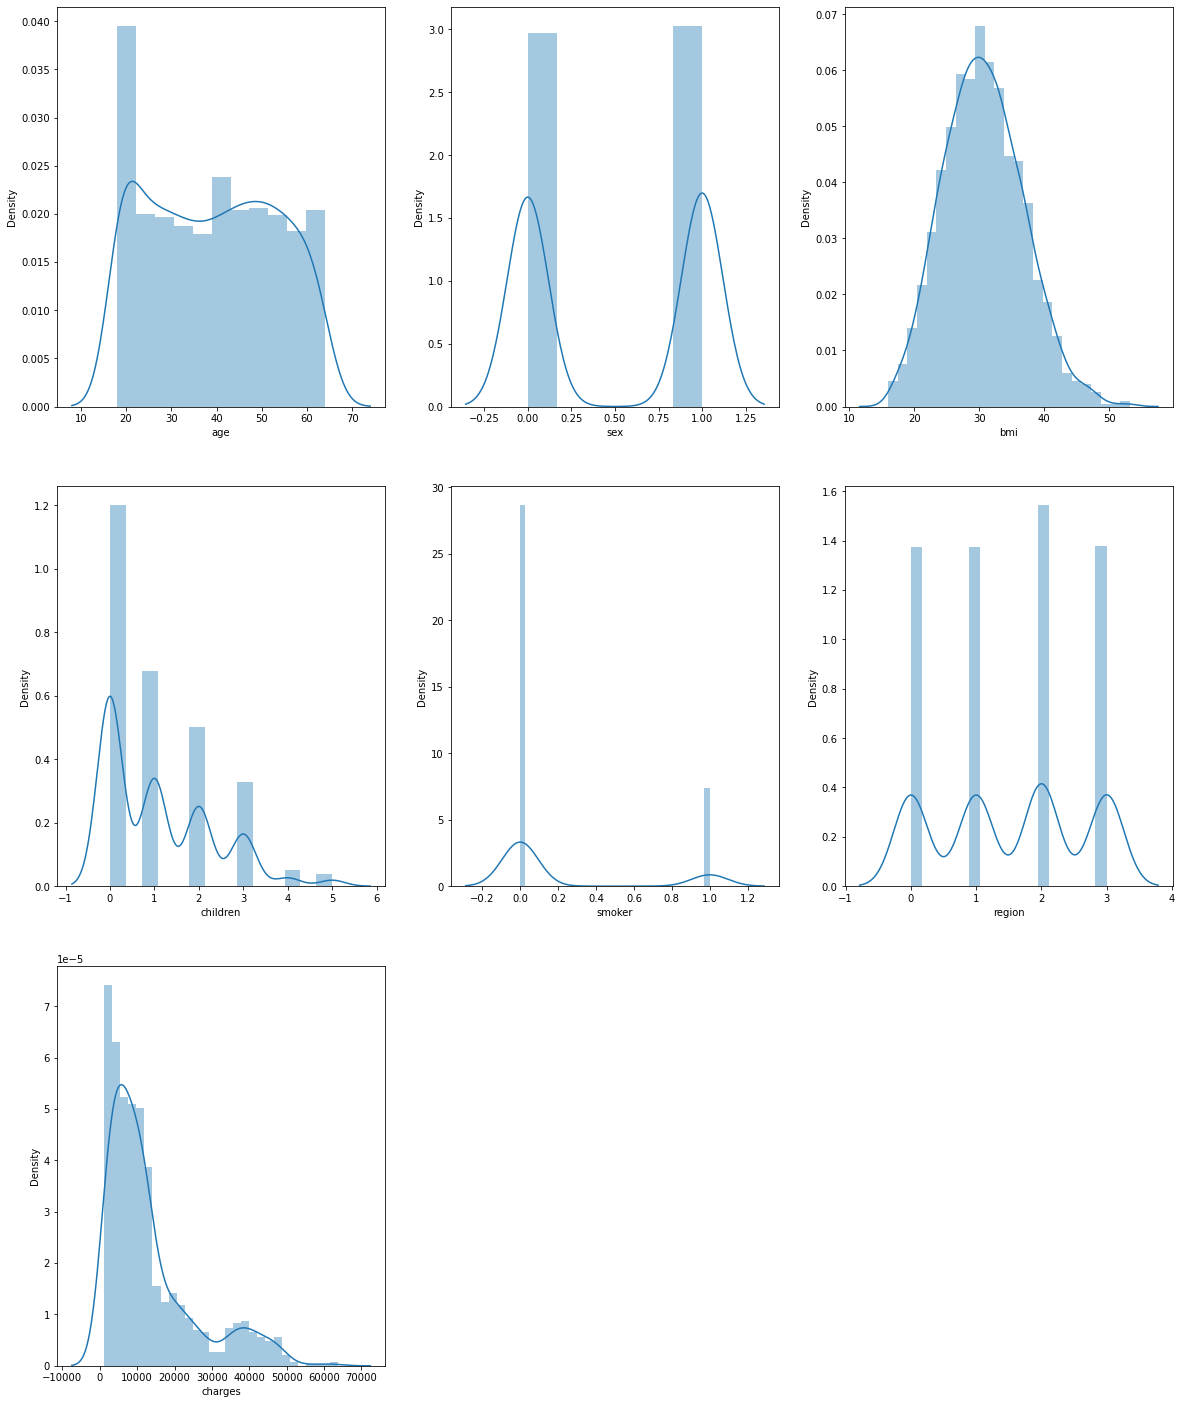

In [21]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [22]:
# Age column in almost normally distributed, bmi is perfect normally distributed and rest are categorical columns and label, so we can't touch them.

# Relationship - feature v/s label

In [23]:
# It is very hard to derive relation b/w feature and label as label has continuous data, it's a regression problem. So it will be very hard for machine to draw graph for it. Also it's impossible to visualize and interpret.

In [24]:
#Instead we can use other way i.e., corrwith to get a rough idea

In [25]:
df.drop('charges',axis=1).corrwith(df.charges)

age         0.298308
sex         0.058044
bmi         0.198401
children    0.067389
smoker      0.787234
region     -0.006547
dtype: float64

In [26]:
# So, yeah we will take all.

# Relationship - feature v/s feature

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
x=df.drop(columns=['charges'])
y=df['charges']

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [30]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Columns']=x.columns
print(vif)

        vif   Columns
0  1.015323       age
1  1.008923       sex
2  1.040634       bmi
3  1.002412  children
4  1.006557    smoker
5  1.025976    region


In [31]:
# No multicollinearity found. We can take all.

# Train-test split and model building

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [33]:
# As it is a regression problem, we will use linear regression for modelling purpose.

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [36]:
lm.score(x_test,y_test)

0.7962578620326621

In [37]:
# We can't use hyper-parameter tuning on LinearRegression as parameters are specific here.

# Congratulations, we have built the model with 80% accuracy score.